<a href="https://colab.research.google.com/github/kingajutrzenka/Programowanie-i-algorytmika/blob/main/kolokwium2/lista7b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lista 7b**

## **Zadanie 1.**
Dane są trzy zbiory A, B, C zawierające imiona. Wypisz:  
a) imiona z wszystkich zbiorów bez powtórzeń (symetrycznej (A u B u C)  
b) które imiona występują jednocześnie w każdym ze zbiorów (A i B i C)  
c) Imiona ze zbioru A \ (B i C)  
d) Imiona ze zbioru (A \ B) u (B \ A)

In [2]:
A = {"Anna", "Basia", "Adam", "Krzysztof", "Ewa"}
B = {"Basia", "Piotr", "Ewa", "Marta", "Adam"}
C = {"Adam", "Anna", "Ola", "Piotr", "Ewa"}

### **a.**
**u**nion

In [3]:
print(A.union(B, C))

{'Basia', 'Piotr', 'Ola', 'Krzysztof', 'Ewa', 'Anna', 'Marta', 'Adam'}


### **b.**

**i**ntersection

In [4]:
print(A.intersection(B, C))

{'Ewa', 'Adam'}


### **d.**

**d**ifference

**i**ntersection

In [5]:
print(A.difference(B.intersection(C)))

{'Anna', 'Basia', 'Krzysztof'}


### **d**

**d**ifference

**u**nion

lub

**symetric_difference**

In [6]:
(A.difference(B)).union(B.difference(A))

{'Anna', 'Krzysztof', 'Marta', 'Piotr'}

In [7]:
A.symmetric_difference(B)

{'Anna', 'Krzysztof', 'Marta', 'Piotr'}

In [8]:
B.symmetric_difference(A)

{'Anna', 'Krzysztof', 'Marta', 'Piotr'}

## **Zadanie 2.**

Dane: wielomian Wn(x) = a0xn + a1xn-1 + … + an-1*x + an, gdzie a0=/=0, ai dla 0 <= i <= n są rzeczywiste, x0 rzeczywiste

Wynik: Wartośd Wn(xo)

Schemat Hornera służy do zmniejszenia potęgi wielomianu, ale w tym przykładzie do obliczenia funkcji wielomianu w punkcie x0

In [9]:
def Horner(n, lista, x): #n - stopień wielomianu, lista - współczynniki wielomianu, x - punkt w którym obliczamy wartość wielomianu
  y = lista[0]
  for i in range(1, n+1, 1):
    y = y*x + lista[i]
  return y

In [10]:
# Dla wielomianu W(x) = 2x³ + 3x² + 5x + 7 w punkcie x = 2:

lista = [2, 3, 5, 7]
n = 3
x = 2

Horner(n, lista, x)

45

## **Zadanie 3.**
  
Dane: epsilon – liczba rzeczywista większa od zera  
Wynik: Oblicz przybliżenie liczby π metodą Monte Carlo z dokładnością.

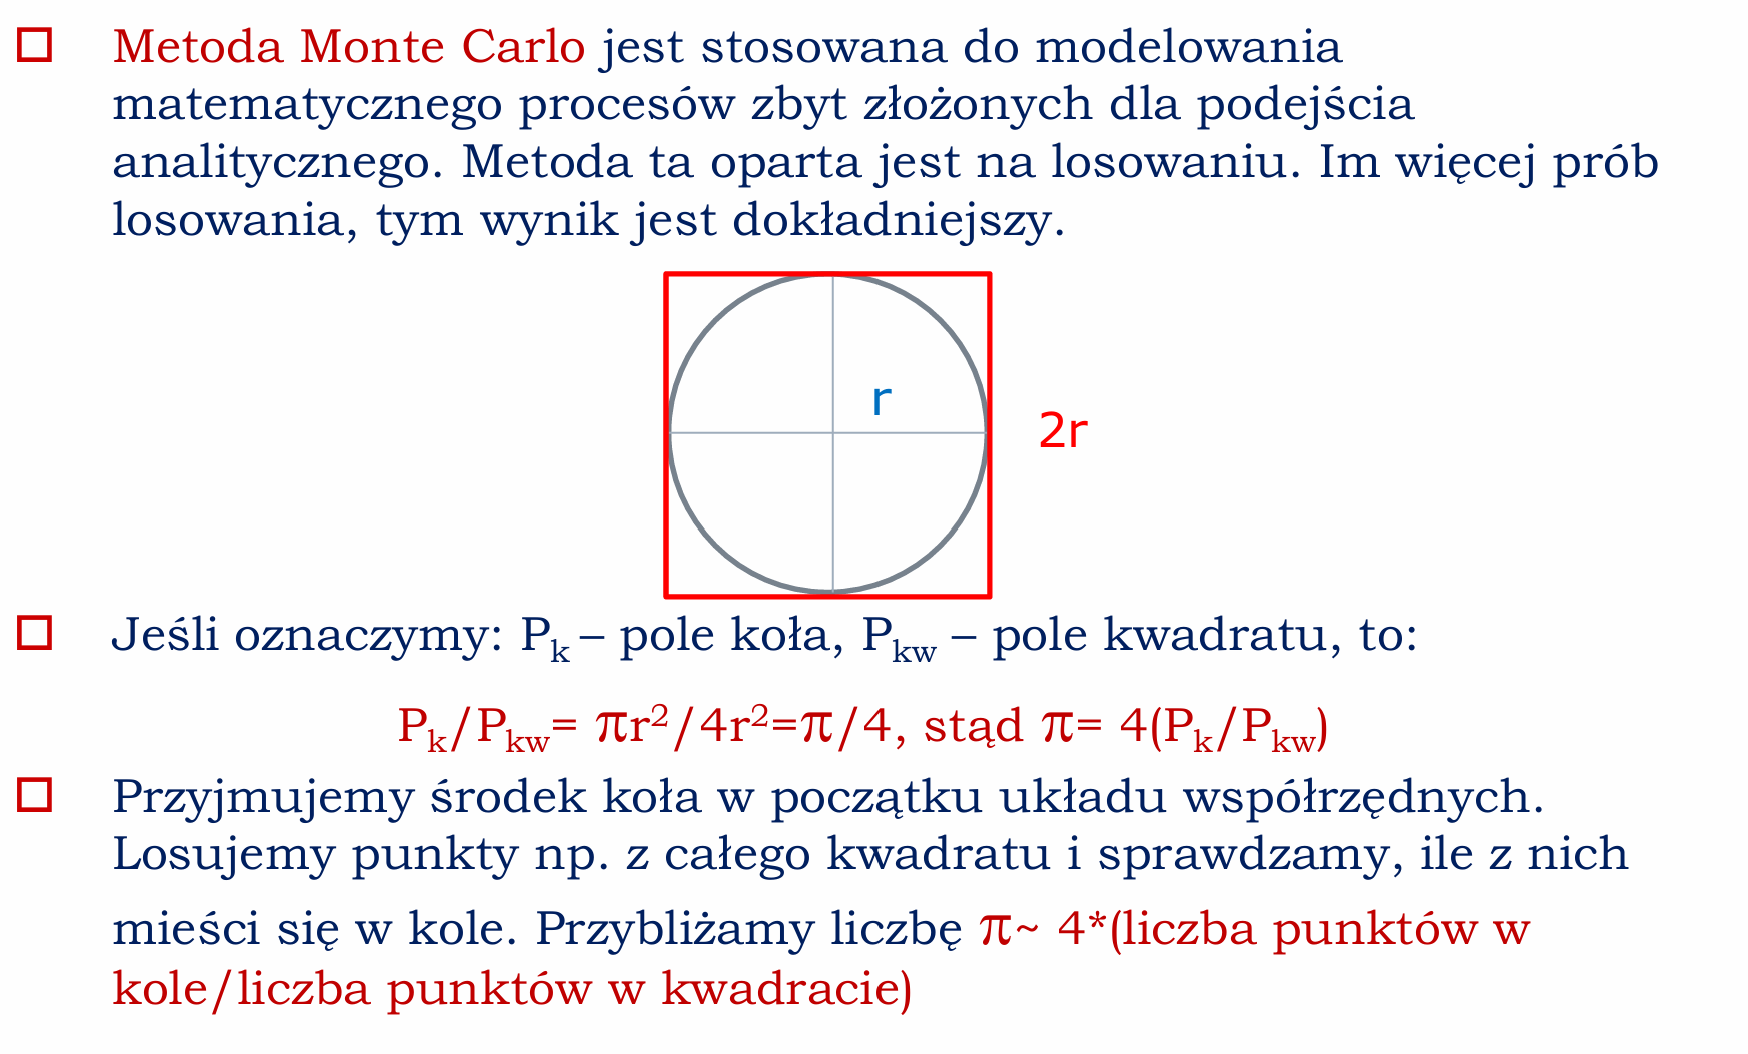

In [14]:
import random

l_l = int((input("Podaj liczbę losowań: ")))
liczba_punktów_w_kole = 0
for i in range(l_l):
  #losujemy współrzędną x, y
  x = random.random() #Almost all module functions depend on the basic function random(), which generates a random float uniformly in the half-open range 0.0 <= X < 1.0.
  y = random.random()
  if (x*x + y*y <= 1): #wtedy punkt jest w kole
    liczba_punktów_w_kole += 1
print(4*liczba_punktów_w_kole/l_l)



Podaj liczbę losowań: 1000
3.14


## **Zadanie 4.**

Dane: a, epsilon – liczby rzeczywiste większe od zera  
Wynik: Pierwiastek kwadratowy liczby a z dokładnością epsilon.

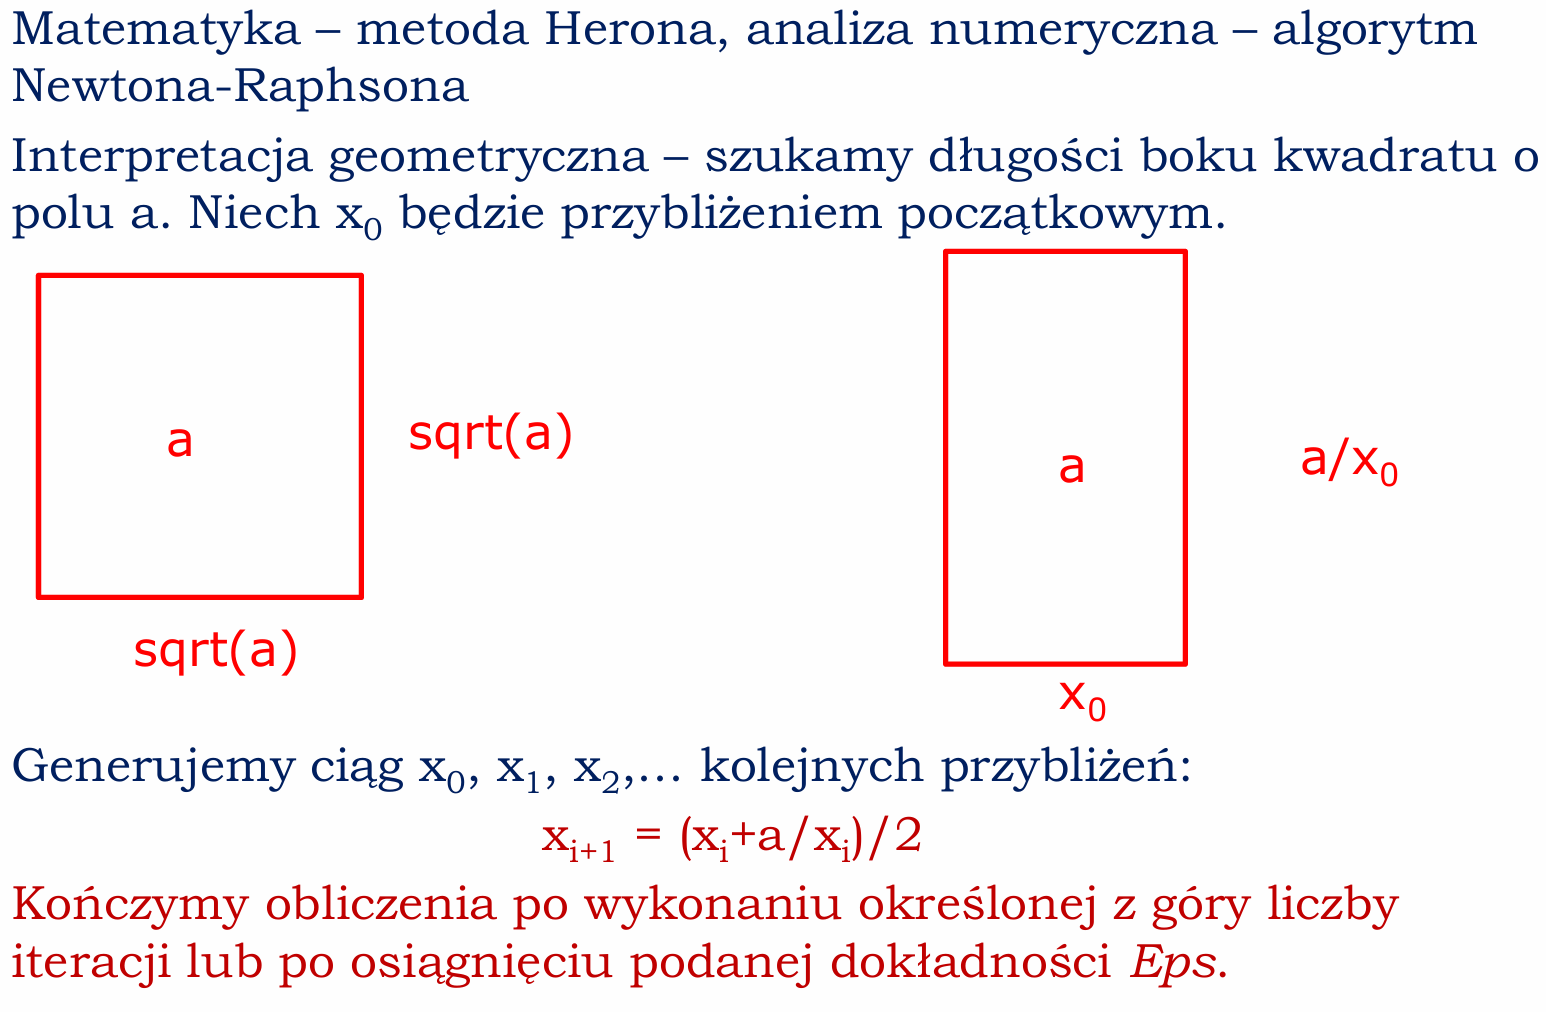

In [22]:
#a - liczba z której chcemy obliczyć pierwiastek
#x0 - przybliżenie początkowe (twój "strzał" na start), Może być dowolna liczba > 0
#eps - dokładność (jak mały błąd akceptujemy)

def sqrt_heron(a, x0, eps):
    x = x0
    while abs(x * x - a) >= eps:
        x = (x + a/x) / 2
    return x

**1. `x = x0`**
- Zaczynamy od przybliżenia początkowego (np. x = 5 dla sqrt(25))

**2. `while abs(x * x - a) >= eps:`**
- Sprawdzamy, czy x² jest wystarczająco blisko liczby a
- `x * x - a` to błąd (różnica między x² a liczbą a)
- `abs(...)` bierze wartość bezwzględną (nieważne czy za duże czy za małe)
- `>= eps` oznacza "czy błąd jest większy niż dopuszczalna dokładność"
- Jeśli TAK → kontynuujemy iteracje
- Jeśli NIE → kończymy i zwracamy wynik

**3. `x = (x + a/x) / 2`**
- To jest wzór Herona: nowe x = średnia z (obecne x) i (a/obecne x)
- Poprawiamy nasze przybliżenie

**4. `return x`**
- Zwracamy obliczony pierwiastek


In [25]:
wynik = sqrt_heron(64, 2 , 0.001)
print(wynik)

8.000001273385879


## **Zadanie 5.**

Dane: funkcja f(x) ciągła w przedziale domkniętym [a, b] i spełniająca f(a)*f(b), epsilon -
długość przedziału w którym znajduje się miejsce zerowe.  

Wynik: Przybliżenie x* zera funkcji w przedziale [a, b] z oczekiwana dokładnością epsilon.

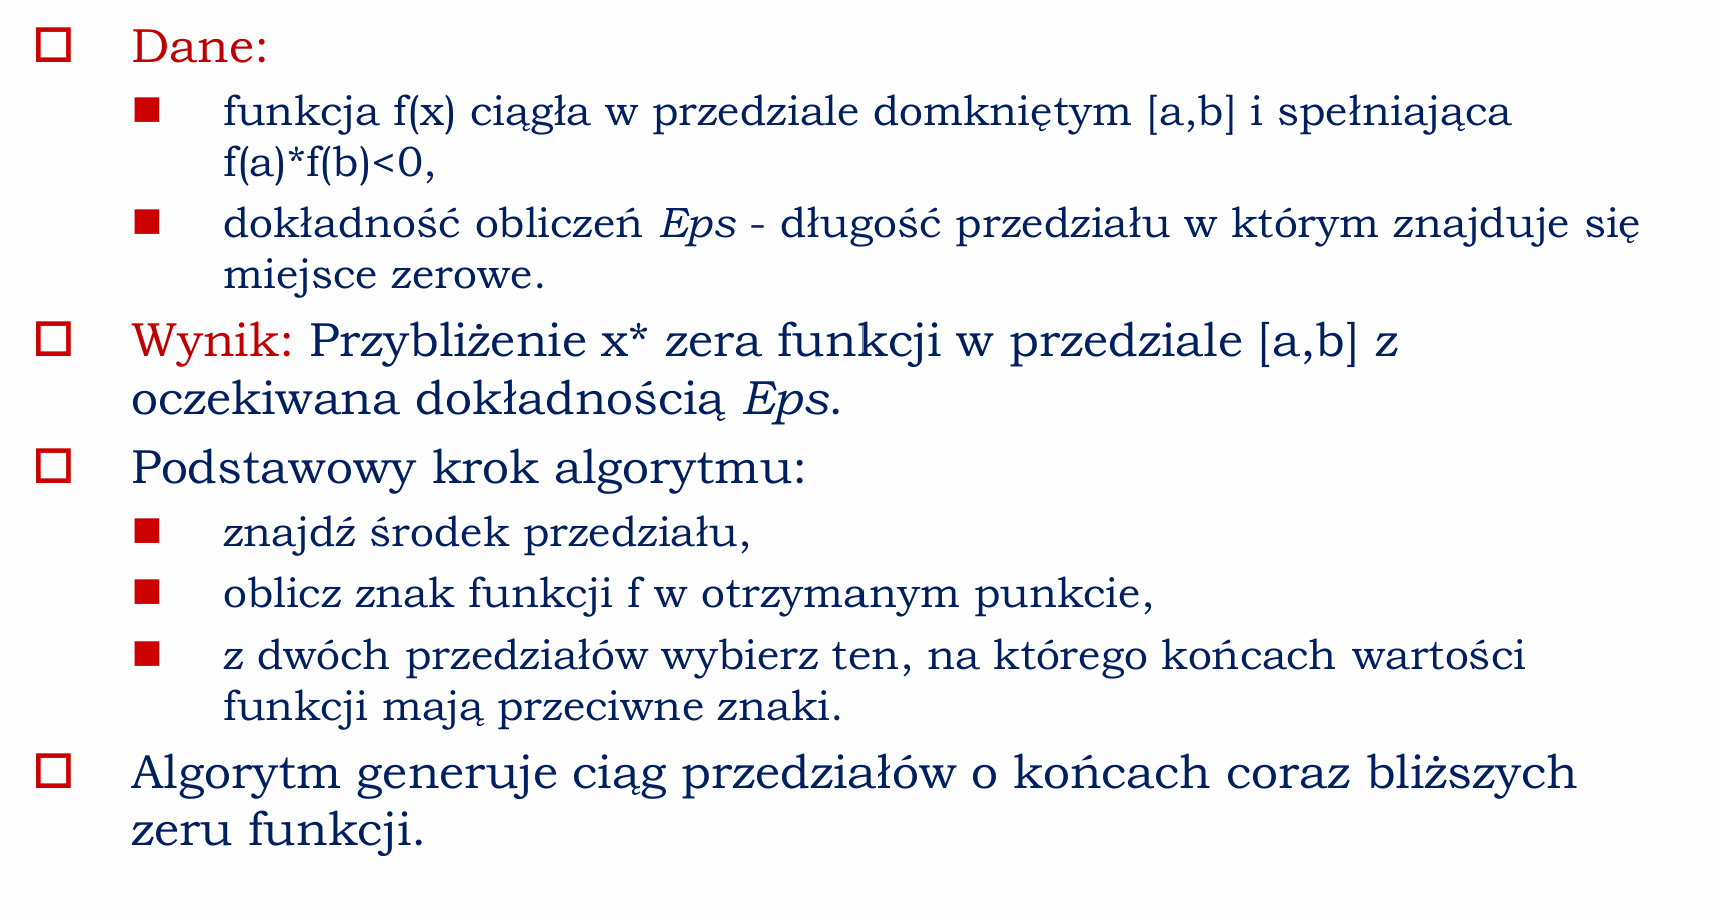

In [41]:
# f - funkcja której miejsca zerowego szukamy
# [a, b] - przedział gdzie znajduje się miejsce zerowe
# eps - dokładność (długość przedziału w którym znajduje miejsce zerowe)

def bisekcja(f, a, b, eps):
    while abs(b - a) >= eps: #jeśli długość przedziału > dokładność
        srodek = (a + b) / 2 #obliczamy środek

        if abs(f(srodek)) < eps:  # Znaleźliśmy dokładne zero!
            return srodek

        elif f(a) * f(srodek) < 0: #sprawdzamy gdzie są przeciwne znaki
            b = srodek
            #Jeśli f(a) i f(środek) mają przeciwne znaki → zero jest między a i środkiem → b = srodek
            #W przeciwnym razie → zero jest między środkiem i b → a = srodek
        else:
            a = srodek

    return (a + b) / 2

In [42]:
def funkcja(x):
    return x**2 - 4

wynik = bisekcja(funkcja, -1, 3, 0.001) #a i b po podstawieniu do funkcji muszą mieć przeciwne znaki np. tu -4 i 5
print(wynik)

2.0
